In [1]:
# Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Loading dataset into a dataframe
pd.set_option('display.max_columns', None)
df0 = pd.read_csv("HR_comma_sep.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Basic information
print(df0.shape)
print(df0.info())

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [4]:
# Descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Displaying all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Renaming columns
df0.rename(columns = {'Work_accident':'work_accident', 'Department':'department'}, inplace = True)

# Displaying all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Checking for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Checking for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspecting some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Dropping duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep = 'first')

df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Boxplot to detect outliers for tenure (time_spend_company)')

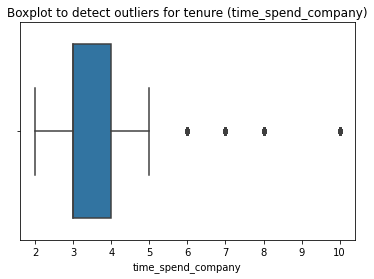

In [11]:
# Creating a boxplot to visualize distribution of `time_spend_company` and detecting any outliers
sns.boxplot(x = df1['time_spend_company'])
plt.title("Boxplot to detect outliers for tenure (time_spend_company)")

In [12]:
# Determining the number of rows containing outliers
#Method 1
#df1[df1['time_spend_company'] > 5].count()[['time_spend_company']] #From the boxplot

#Method 2
df1['time_spend_company'].describe()
Q3 = 4.000000 #df1['time_spend_company'].quantile(0.75)
Q1 = 3.000000 #df1['time_spend_company'].quantile(0.25)
iqr = Q3 - Q1
lower_lim = Q1 - (1.5 * iqr)
upper_lim = Q3 + (1.5 * iqr)
print("Number of rows with outliers: ", len(df1[(df1['time_spend_company'] < lower_lim) | (df1['time_spend_company'] > upper_lim)]))

Number of rows with outliers:  824


In [13]:
# Getting number of people who left vs. stayed
print(df1['left'].value_counts())

# Getting percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True) * 100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


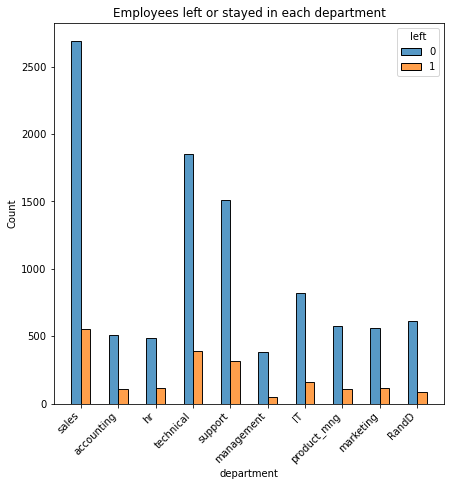

In [14]:
# Employees left or stayed in each department
plt.figure(figsize = (7,7))
g = sns.histplot(x = df1['department'], hue = df1['left'], hue_order=[0, 1], multiple = 'dodge', shrink = 0.5)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.title('Employees left or stayed in each department')
plt.show()

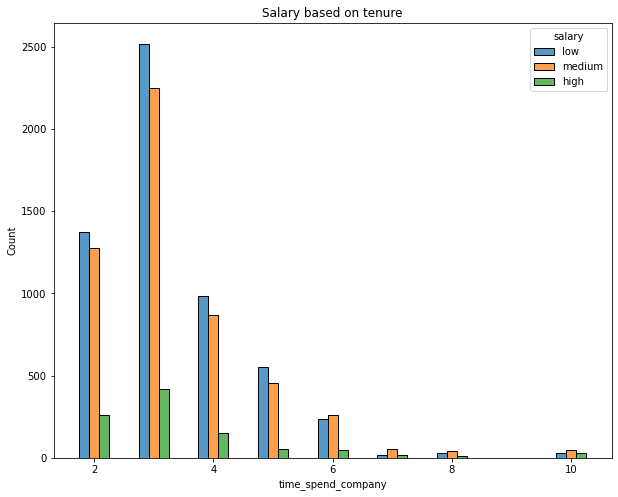

In [15]:
# Salary based on tenure
plt.figure(figsize = (10, 8))
sns.histplot(x = df1['time_spend_company'], hue = df1['salary'], hue_order=['low', 'medium', 'high'], multiple = 'dodge', shrink = 0.5, discrete = 1)
plt.title('Salary based on tenure')
plt.show()

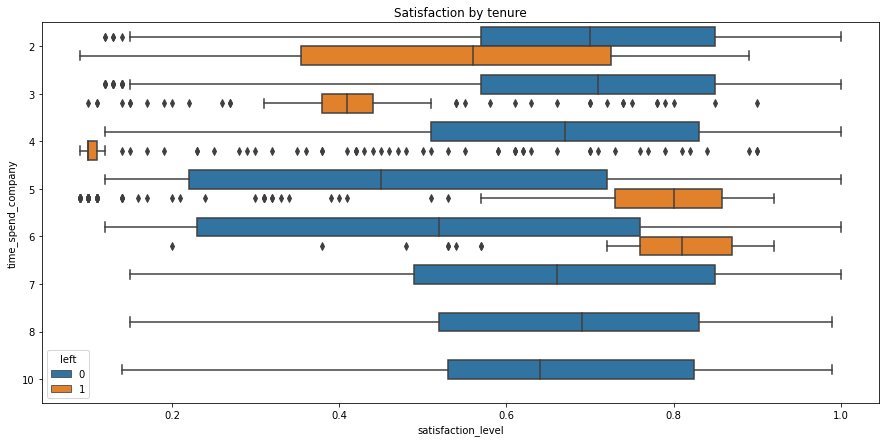

In [16]:
# Satisfaction by tenure
plt.figure(figsize = (15,7))
sns.boxplot(x = df1['satisfaction_level'], y = df1['time_spend_company'], hue = df1['left'], orient = 'h')
plt.title('Satisfaction by tenure')
plt.show()

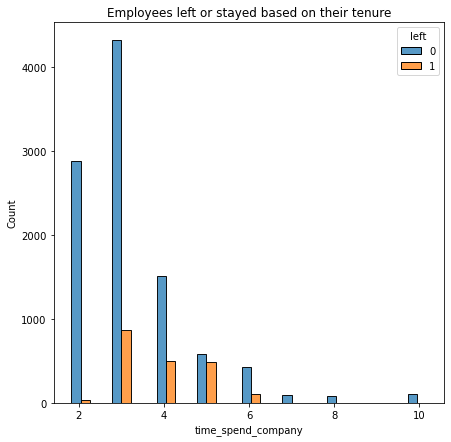

In [17]:
# Employees left or stayed based on their tenure
plt.figure(figsize = (7,7))
sns.histplot(x = df1['time_spend_company'], hue = df1['left'], multiple = 'dodge', shrink = 5)
plt.title('Employees left or stayed based on their tenure')
plt.show()

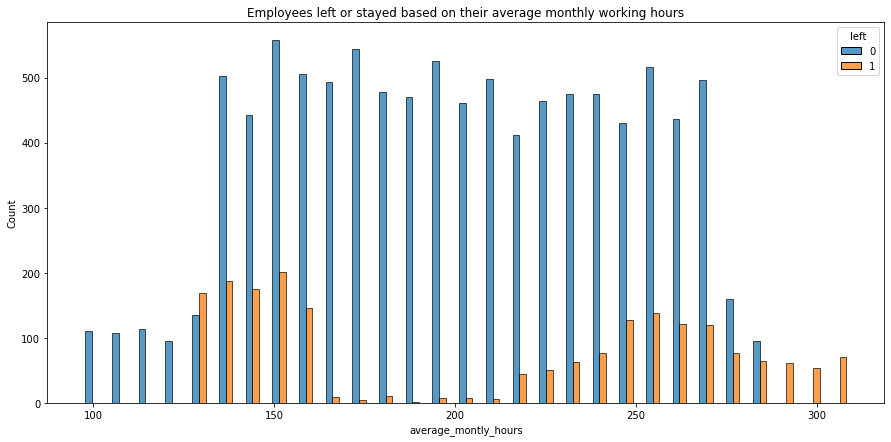

In [18]:
# Employees left or stayed based on their average monthly working hours
plt.figure(figsize = (15,7))
sns.histplot(x = df1['average_montly_hours'], hue = df1['left'], multiple = 'dodge', shrink = 0.5)
plt.title('Employees left or stayed based on their average monthly working hours')
plt.show()

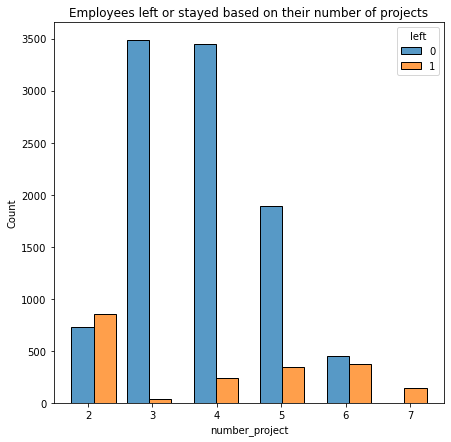

In [19]:
# Employees left or stayed based on their number of projects
plt.figure(figsize = (7,7))
sns.histplot(x = df1['number_project'], hue = df1['left'], multiple = 'dodge', shrink = 4)
plt.title('Employees left or stayed based on their number of projects')
plt.show()

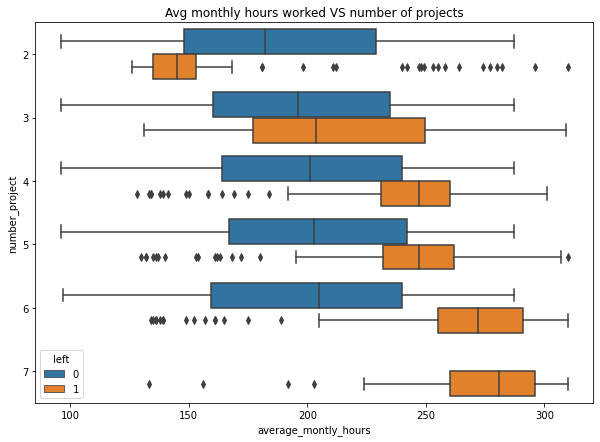

In [20]:
# Avg monthly hours worked VS number of projects
plt.figure(figsize = (10,7))
sns.boxplot(x = df1['average_montly_hours'], y = df1['number_project'], hue = df1['left'], orient = 'h')
plt.title('Avg monthly hours worked VS number of projects')
plt.show()

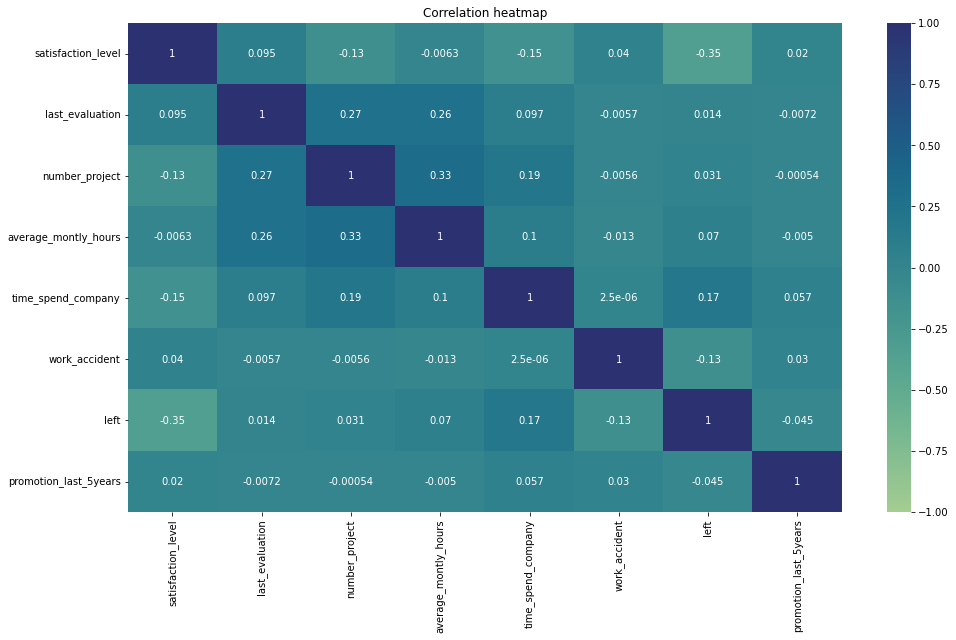

In [21]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
correlation = df1.corr(method = 'pearson')
sns.heatmap(data = correlation, annot = True, vmin=-1, vmax=1, cmap="crest")
plt.title("Correlation heatmap");
#plt.show()

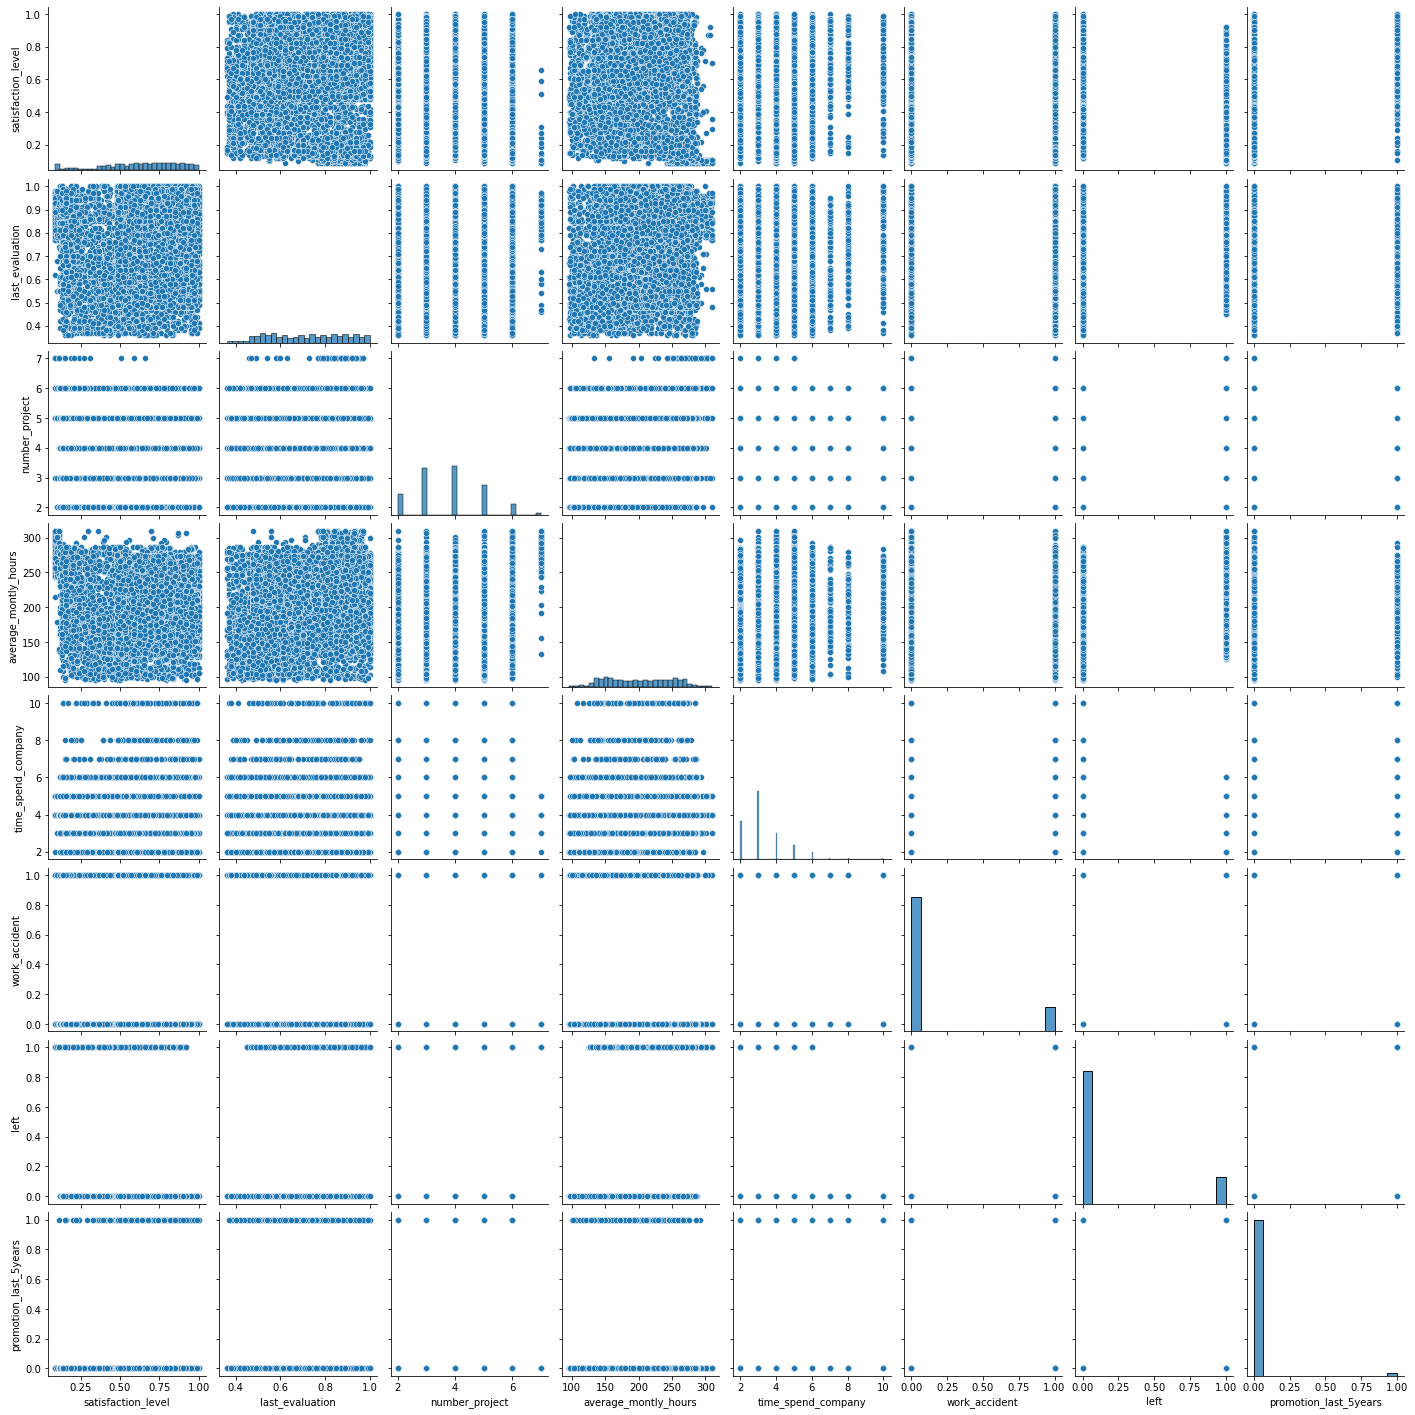

In [22]:
sns.pairplot(df1)

In [23]:
###Making a table to get all the results
def make_results(model_name, y_testdata, y_preddata):
    accuracy = accuracy_score(y_testdata, y_preddata)
    precision = precision_score(y_testdata, y_preddata)
    recall = recall_score(y_testdata, y_preddata)
    f1 = f1_score(y_testdata, y_preddata)
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                         })
    return table

In [24]:
Final_results = pd.DataFrame()

In [25]:
###LOGISTIC REGRESSION

In [26]:
#Encoding the data
df_dum = df1.copy()
df_dum['salary'] = df_dum['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df_dum = pd.get_dummies(df_dum, drop_first = False)

In [27]:
#Removing outliers of tenure and making a final dataframe
df_log = df_dum[(df_dum['time_spend_company'] >= lower_lim) & (df_dum['time_spend_company'] <= upper_lim)]
df_log.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
#Checking for class imbalance (Already did - In [13])

In [29]:
#Getting independent (X) and dependent variables (y)
y1 = df_log['left']
X1 = df_log.drop('left', axis = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, stratify = y1, random_state = 42)

In [30]:
#Regression
log_classifier = LogisticRegression(random_state = 42, max_iter=500)
log_model = log_classifier.fit(X_train1, y_train1)

In [31]:
y_pred1 = log_model.predict(X_test1)

In [32]:
coeff = log_model.coef_
intercept = log_model.intercept_
print('Coefficient: ', coeff)
print('Intercept: ', intercept)

Coefficient:  [[-4.34221595e+00 -1.15444697e-02 -4.86120495e-01  3.57214959e-03
   1.10422498e+00 -1.50082616e+00 -1.16290829e+00 -5.21514963e-01
  -8.04364757e-02 -3.22737318e-01 -2.86185282e-01 -2.65958307e-03
  -1.96840383e-01 -1.13398552e-01 -9.98545309e-02  3.32141266e-02
   2.17614136e-02  2.83189803e-02]]
Intercept:  [-1.31819065]


In [33]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test1, y_pred1, target_names=target_names))
print(accuracy_score(y_test1, y_pred1))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792

0.8194842406876791


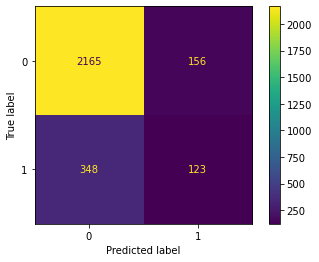

In [34]:
#Confusion matrix
cm1 = confusion_matrix(y_test1, y_pred1, labels = log_model.classes_)
disp1 = ConfusionMatrixDisplay(cm1, display_labels = log_model.classes_)
disp1.plot(values_format='')
plt.show()

In [35]:
#Putting the results in a table
logres = {'model': 'Logistic regression model', 'precision': 0.44, 'recall': 0.26, 'f1': 0.33, 'accuracy': 0.82}
Final_results = Final_results.append(logres, ignore_index = True)

In [36]:
###DECISION TREE

In [37]:
#Encoding the data (We can also use the df_log dataframe)
df_destree = df1.copy()
df_destree['salary'] = df_destree['salary'].map({'low': 1, 'medium': 2, 'high': 3})
df_destree['department'] = df_destree['department'].map({'sales': 1, 'accounting': 2,'hr': 3, 'technical': 4, 'support': 5, 'management': 6, 'IT': 7, 'product_mng': 8, 'marketing': 9, 'RandD': 10})

In [38]:
#Getting independent (X) and dependent variables (y)
y2 = df_destree['left']
X2 = df_destree.drop('left', axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, stratify = y2, random_state = 42)

In [39]:
#Using Grid Search to find the best HyperParameters (HyperParameter tuning) and then making the Decision Tree
tree_para = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50], 'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [40]:
destree_classifier = DecisionTreeClassifier(random_state = 42)
destree_model = GridSearchCV(destree_classifier, tree_para, scoring = scoring, cv = 5, refit = 'f1')
destree_model = destree_model.fit(X_train2, y_train2)

In [41]:
y_pred2 = destree_model.predict(X_test2)

In [42]:
print(destree_model.best_estimator_)
print(destree_model.best_params_)
print(destree_model.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
{'max_depth': 8, 'min_samples_leaf': 4}
0.9433818201993374


In [43]:
#Metrics
print("Accuracy:", "%.6f" % accuracy_score(y_test2, y_pred2))
print("Precision:", "%.6f" % precision_score(y_test2, y_pred2))
print("Recall:", "%.6f" % recall_score(y_test2, y_pred2))
print("F1 Score:", "%.6f" % f1_score(y_test2, y_pred2))

Accuracy: 0.983322
Precision: 0.976596
Recall: 0.921687
F1 Score: 0.948347


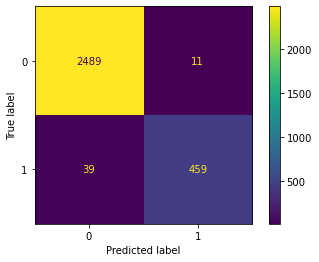

In [44]:
#Confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2, labels = destree_model.classes_)
disp2 = ConfusionMatrixDisplay(cm2, display_labels = destree_model.classes_)
disp2.plot(values_format = '')
plt.show()

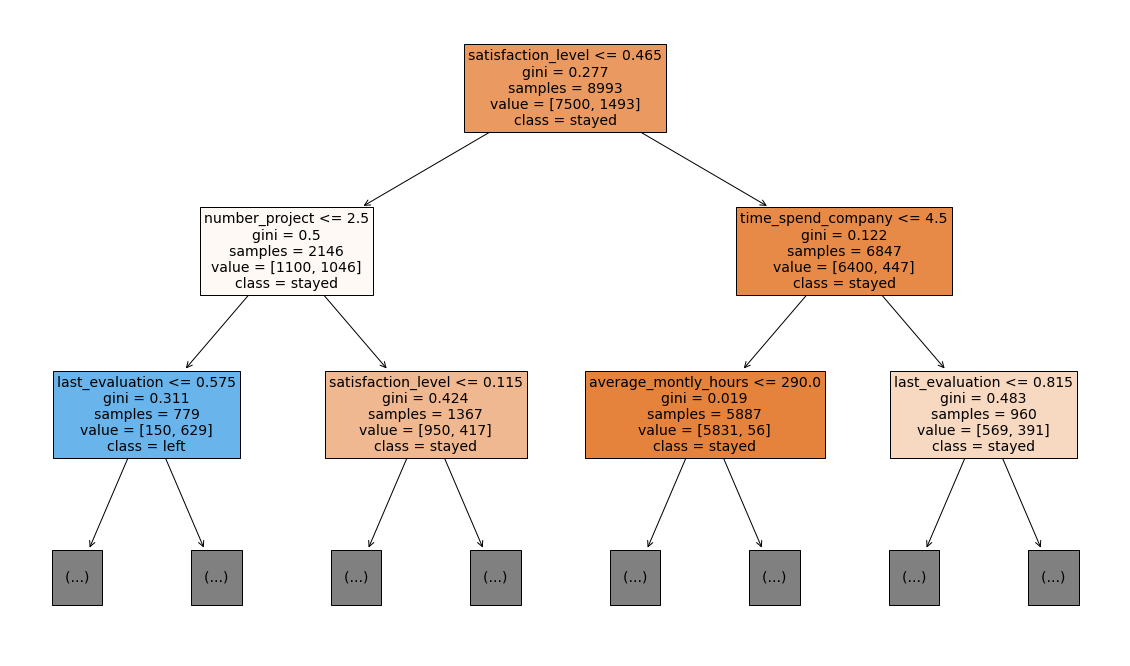

In [45]:
#Plotting the tree
plt.figure(figsize=(20,12))
plot_tree(destree_model.best_estimator_, max_depth=2, fontsize=14, feature_names=X2.columns, class_names={0:'stayed', 1:'left'}, filled = True)
plt.show()

In [46]:
#Feature importance

In [47]:
#Calculating importance
tree_importance = pd.DataFrame(destree_model.best_estimator_.feature_importances_, 
                                 columns = ['gini_importance'], 
                                 index = X2.columns
                                )
tree_importance = tree_importance.sort_values(by = 'gini_importance', ascending = False)

#Only extracting the features with importances > 0
tree_importance = tree_importance[tree_importance['gini_importance'] != 0]
tree_importance

,gini_importance
satisfaction_level,0.494028
last_evaluation,0.168094
number_project,0.131864
time_spend_company,0.124445
average_montly_hours,0.079650
department,0.001667
salary,0.000251


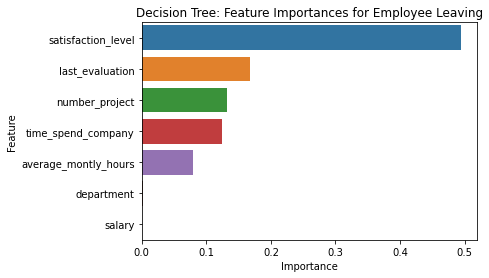

In [48]:
#Plotting the feature importance graph (Bar plot)
sns.barplot(data = tree_importance, x = "gini_importance", y = tree_importance.index, orient = 'h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize = 12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [49]:
#Putting the results in a table
Final_results = Final_results.append(make_results('Decision tree', y_test2, y_pred2), ignore_index = True)

In [50]:
###RANDOM FOREST

In [51]:
#Encoding the data (Same as df_log)
df_rand = df1.copy()
df_rand['salary'] = df_rand['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df_rand = pd.get_dummies(df_rand, drop_first = False)

In [52]:
#Getting independent (X) and dependent variables (y)
y3 = df_rand['left']
X3 = df_rand.drop('left', axis = 1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.25, stratify = y3, random_state = 42)

In [53]:
#Using Grid Search to find the best HyperParameters (HyperParameter tuning) and then making the Random Forest
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [54]:
%%time
classifier_forest = RandomForestClassifier(random_state = 42)
model_forest = GridSearchCV(classifier_forest, cv_params, scoring = scoring, cv = 4, refit = 'f1')
model_forest = model_forest.fit(X_train3, y_train3)

CPU times: user 10min 5s, sys: 0 ns, total: 10min 5s
Wall time: 10min 7s


In [55]:
print(model_forest.best_score_)
print(model_forest.best_params_)
print(model_forest.best_estimator_)

0.9504774318702975
{'max_depth': None, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [56]:
#Making the optimal random forest using the best parameters
classifier_forestOPT = RandomForestClassifier(max_depth=None, max_features=1.0, max_samples=0.7, min_samples_leaf=1,
                                              min_samples_split=3, n_estimators=300, random_state=42)
model_forestOPT = classifier_forestOPT.fit(X_train3, y_train3)

In [57]:
y_pred3 = model_forestOPT.predict(X_test3)

In [58]:
#Metrics
print("Accuracy:", "%.6f" % accuracy_score(y_test3, y_pred3))
print("Precision:", "%.6f" % precision_score(y_test3, y_pred3))
print("Recall:", "%.6f" % recall_score(y_test3, y_pred3))
print("F1 Score:", "%.6f" % f1_score(y_test3, y_pred3))

Accuracy: 0.986658
Precision: 0.989316
Recall: 0.929719
F1 Score: 0.958592


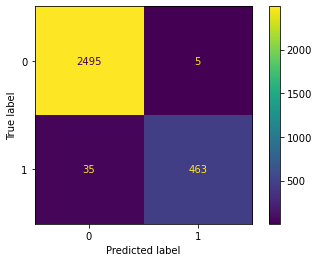

In [59]:
#Confusion Matrix
cm3 = confusion_matrix(y_test3, y_pred3, labels = model_forestOPT.classes_)
disp3 = ConfusionMatrixDisplay(cm3, display_labels = model_forestOPT.classes_)
disp3.plot(values_format = '')
plt.show()

In [60]:
#Feature Importance

In [61]:
#Calculating importance
forest_importance = pd.DataFrame(model_forest.best_estimator_.feature_importances_, 
                                 columns = ['gini_importance'], 
                                 index = X3.columns
                                )
forest_importance = forest_importance.sort_values(by = 'gini_importance', ascending = False)

#Only extracting the features with importances > 0 and only taking the first 10 features
forest_importance = forest_importance[forest_importance['gini_importance'] != 0]
forest_importance = forest_importance.head(10)
forest_importance

,gini_importance
satisfaction_level,0.441836
number_project,0.162404
last_evaluation,0.159311
time_spend_company,0.116842
average_montly_hours,0.097489
salary,0.005410
department_sales,0.002930
department_technical,0.002622
department_support,0.002476
department_IT,0.001632


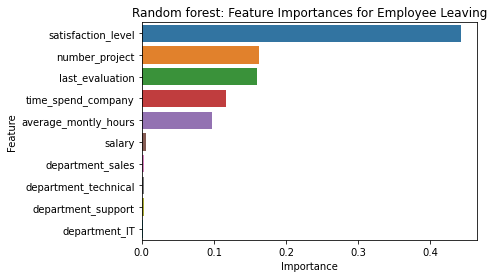

In [62]:
#Plotting the feature importance graph (Bar plot)
sns.barplot(data = forest_importance, x = "gini_importance", y = forest_importance.index, orient = 'h')
plt.title("Random forest: Feature Importances for Employee Leaving", fontsize = 12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [63]:
#Putting the results in a table
Final_results = Final_results.append(make_results('Random forest', y_test3, y_pred3), ignore_index = True)

In [64]:
###XGBOOST MODEL

In [65]:
#Encoding the data (Same as df_log)
df_xgb = df1.copy()
df_xgb['salary'] = df_xgb['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
df_xgb = pd.get_dummies(df_xgb, drop_first = False)

In [66]:
#Getting independent (X) and dependent variables (y)
y4 = df_xgb['left']
X4 = df_xgb.drop('left', axis = 1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.25, stratify = y4, random_state = 42)

In [67]:
#Using Grid Search to find the best HyperParameters (HyperParameter tuning) and then making an XGBoost model
cv_params = {'max_depth': [4, 6],
             'min_child_weight': [3, 5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [5,10,15],
             'subsample': [0.7],
             'colsample_bytree': [0.7]
            }
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [68]:
xgb_classifier = XGBClassifier(objective = 'binary:logistic', random_state = 42)
xgb_model = GridSearchCV(xgb_classifier, cv_params, scoring = scoring, cv = 5, refit = 'f1')
xgb_model = xgb_model.fit(X_train4, y_train4)

In [69]:
y_pred4 = xgb_model.predict(X_test4)

In [70]:
print(xgb_model.best_score_)
print(xgb_model.best_params_)
print(xgb_model.best_estimator_)

0.9397970586612077
{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 5, 'subsample': 0.7}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)


In [71]:
#Metrics
print("Accuracy:", "%.6f" % accuracy_score(y_test4, y_pred4))
print("Precision:", "%.6f" % precision_score(y_test4, y_pred4))
print("Recall:", "%.6f" % recall_score(y_test4, y_pred4))
print("F1 Score:", "%.6f" % f1_score(y_test4, y_pred4))

Accuracy: 0.982655
Precision: 0.980603
Recall: 0.913655
F1 Score: 0.945946


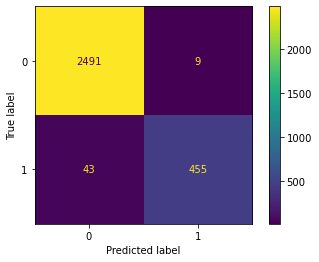

In [72]:
#Confusion Matrix
cm4 = confusion_matrix(y_test4, y_pred4, labels = xgb_model.classes_)
disp4 = ConfusionMatrixDisplay(cm4, display_labels = xgb_model.classes_)
disp4.plot(values_format = '')
plt.show()

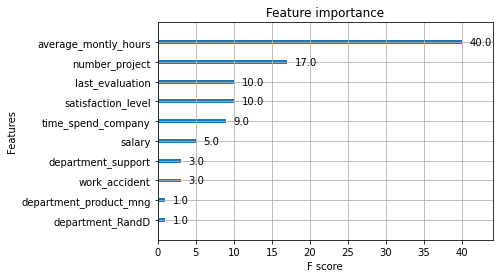

In [73]:
#Feature importance
plot_importance(xgb_model.best_estimator_);

In [74]:
#Putting the results in a table
Final_results = Final_results.append(make_results('XGB Model', y_test4, y_pred4), ignore_index = True)

In [75]:
#Final results of all models
Final_results

,model,precision,recall,f1,accuracy
0,Logistic regression model,0.440000,0.260000,0.330000,0.820000
1,Decision tree,0.976596,0.921687,0.948347,0.983322
2,Random forest,0.989316,0.929719,0.958592,0.986658
3,XGB Model,0.980603,0.913655,0.945946,0.982655
